/tmp/ipykernel_1786294/2530352480.py:27: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="single")


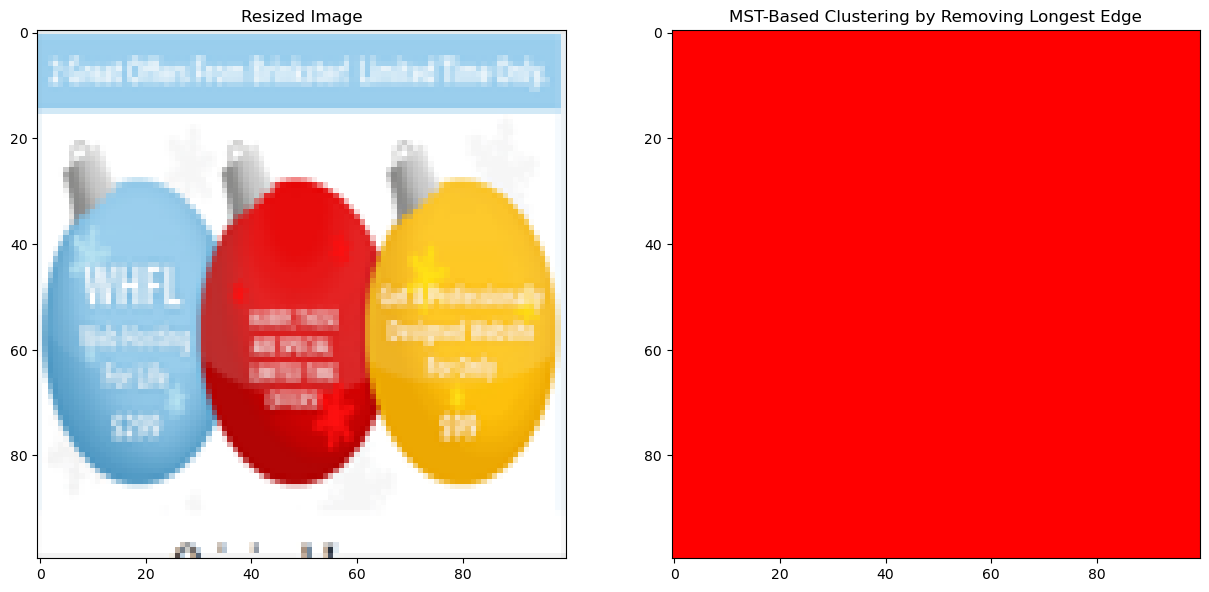

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.sparse.csgraph import minimum_spanning_tree
from PIL import Image

# Load the image
image_path = "/home/voy/space/cud/dcrun/images/xmas.png"
image = Image.open(image_path)
image = image.convert("RGB")  # Ensure image is in RGB format

# Resize the image
new_size = (100, 100)  # Example new size (width, height)
image_resized = image.resize(new_size)

# Convert the image to a numpy array
image_np = np.array(image_resized)

# Flatten the image to shape (num_pixels, 3)
pixels = image_np.reshape(-1, 3)

# Compute the distance matrix
distance_matrix = squareform(pdist(pixels, metric="euclidean"))

# Compute the MST using single linkage hierarchical clustering
Z = linkage(distance_matrix, method="single")

# Identify the longest edge in the MST
longest_edge = np.max(Z[:, 2])

# Form clusters by removing the longest edge
clusters = fcluster(Z, longest_edge, criterion="distance")

# Reshape the clusters to the original image shape
clustered_image = clusters.reshape(image_np.shape[0], image_np.shape[1])

# Display the original and clustered images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title("Resized Image")

plt.subplot(1, 2, 2)
plt.imshow(clustered_image, cmap="prism")
plt.title("MST-Based Clustering by Removing Longest Edge")

plt.show()

/tmp/ipykernel_1786294/3146109689.py:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="single")


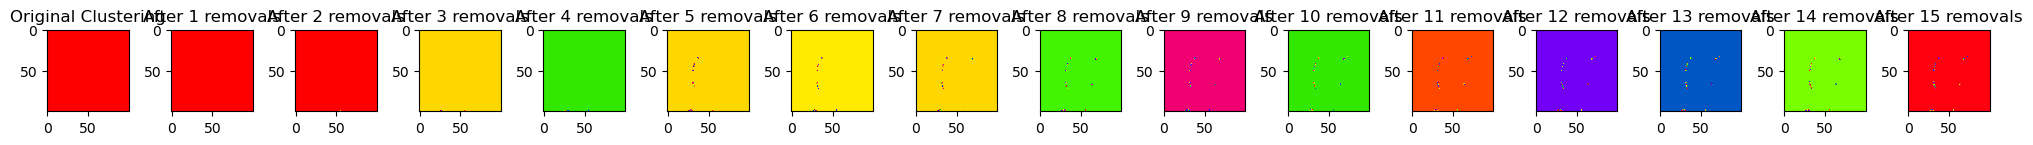

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from PIL import Image

# Load the image
image_path = "/home/voy/space/cud/dcrun/images/xmas.png"
image = Image.open(image_path)
image = image.convert("RGB")  # Ensure image is in RGB format

# Resize the image
new_size = (100, 100)  # Example new size (width, height)
image_resized = image.resize(new_size)

# Convert the image to a numpy array
image_np = np.array(image_resized)

# Flatten the image to shape (num_pixels, 3)
pixels = image_np.reshape(-1, 3)

# Compute the distance matrix
distance_matrix = squareform(pdist(pixels, metric="euclidean"))

# Compute the MST using single linkage hierarchical clustering
Z = linkage(distance_matrix, method="single")

# Plotting after each removal
num_removals = 15  # Number of edges to remove iteratively
fig, axs = plt.subplots(1, num_removals + 1, figsize=(20, 5))

# Initial plot before any removal
clusters = fcluster(Z, t=max(Z[:, 2]), criterion="distance")
clustered_image = clusters.reshape(image_np.shape[0], image_np.shape[1])
axs[0].imshow(clustered_image, cmap="prism")
axs[0].set_title("Original Clustering")

# Iteratively remove the longest edges and plot
for i in range(1, num_removals + 1):
    # Remove the i-th longest edge
    max_d = np.sort(Z[:, 2])[-i]
    clusters = fcluster(Z, t=max_d, criterion="distance")

    # Reshape the clusters to the original image shape
    clustered_image = clusters.reshape(image_np.shape[0], image_np.shape[1])

    # Plot the updated clustering
    axs[i].imshow(clustered_image, cmap="prism")
    axs[i].set_title(f"After {i} removals")

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from PIL import Image

# Load the image
image_path = "/home/voy/space/cud/dcrun/images/xmas.png"
image = Image.open(image_path)
image = image.convert("RGB")  # Ensure image is in RGB format

# Resize the image
new_size = (100, 100)  # Example new size (width, height)
image_resized = image.resize(new_size)

# Convert the image to a numpy array
image_np = np.array(image_resized)

# Flatten the image to shape (num_pixels, 3)
pixels = image_np.reshape(-1, 3)

# Compute the distance matrix
distance_matrix = squareform(pdist(pixels, metric="euclidean"))

# Compute the MST using single linkage hierarchical clustering
Z = linkage(distance_matrix, method="single")


def detect_outliers(clusters, min_cluster_size=10):
    """
    Detects outliers based on cluster size.
    Clusters with fewer elements than min_cluster_size are considered outliers.
    """
    cluster_counts = np.bincount(clusters)
    outlier_clusters = np.where(cluster_counts < min_cluster_size)[0]
    outliers = np.isin(clusters, outlier_clusters)
    return outliers


# Initial plot before any removal
clusters = fcluster(Z, t=max(Z[:, 2]), criterion="distance")
outliers = detect_outliers(clusters)
clustered_image = clusters.reshape(image_np.shape[0], image_np.shape[1])

# Mark outliers with a specific color (e.g., black)
clustered_image[outliers.reshape(image_np.shape[0], image_np.shape[1])] = 0
plt.imshow(clustered_image, cmap="prism")
plt.title("Original Clustering")
plt.savefig("original_clustering.png")

# Iteratively remove the longest edges and plot
num_removals = 105  # Number of edges to remove iteratively
for i in range(1, num_removals + 1):
    # Remove the i-th longest edge
    max_d = np.sort(Z[:, 2])[-i]
    clusters = fcluster(Z, t=max_d, criterion="distance")

    # Detect and handle outliers
    outliers = detect_outliers(clusters)

    # Reshape the clusters to the original image shape
    clustered_image = clusters.reshape(image_np.shape[0], image_np.shape[1])

    # Mark outliers with a specific color (e.g., black)
    clustered_image[outliers.reshape(image_np.shape[0], image_np.shape[1])] = 0

    # Plot the updated clustering
    plt.imshow(clustered_image, cmap="prism")
    plt.title(f"After {i} removals")
    plt.savefig(f"clustering_after_{i}_removals.png")
    plt.close()

print("All plots saved as separate images.")

/tmp/ipykernel_1786294/3475516415.py:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="single")


All plots saved as separate images.
